# The Sparks Foundation

# GRIP SEPTEMBER 2021

# INTERNSHIP DOMAIN: DATA SCIENCE & BUSINESS ANALYTICS

# INTERN NAME: SAYAM KUMAR

## Task 5: Exploratory Data Analysis(EDA) on Sports

## Let's import the relevant libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [2]:
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
np.set_printoptions(suppress=True,linewidth=150,precision=2)

## Let's import the datasets.

In [4]:
data1 = pd.read_csv('deliveries.csv')
deliveries = data1.copy()
data2 = pd.read_csv('matches.csv')
matches = data2.copy()

In [5]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## Merging the two datasets

In [7]:
ipl_data = pd.merge(deliveries,matches,left_on='match_id',right_on='id')
ipl_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [8]:
ipl_data.set_index('match_id')

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
match_id,,,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


## Let's review information about the dataset.

In [9]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

## Let's rename all the columns.

In [10]:
ipl_data.rename(columns={'match_id': 'Match ID','inning': 'Innings','batting_team': 'Batting Team','bowling_team': 'Bowling Team','over': 'Over','ball': 'Ball','batsman': 'Batsman','non_striker': 'Non Striker','bowler': 'Bowler','is_super_over': 'isSuperOver','wide_runs': 'Wide Runs','bye_runs': 'Bye Runs','legbye_runs': 'Legbye Runs','noball_runs': 'No Ball Runs','penalty_runs': 'Penalty Runs','batsman_runs': 'Batsman Runs','extra_runs': 'Extra Runs','total_runs': 'Total Runs','player_dismissed': 'Player Dismissed','dismissal_kind': 'Dismissal Kind','fielder': 'Fielder','season': 'Season','city': 'City','date': 'Date','team1': 'Team 1','team2': 'Team 2','toss_winner': 'Toss Winner','toss_decision': 'Toss Decision','result': 'Result','dl_applied': 'Duckworth-Lewis(DL) Method Applied','winner': 'Winner','win_by_runs': 'Win by Runs','win_by_wickets': 'Win by Wickets','player_of_match': 'Player of the Match','venue': 'Venue','umpire1': 'Umpire 1','umpire2': 'Umpire 2','umpire3': 'Umpire 3'},inplace=True)

## Let's drop 'id' column as it is not required anymore.

In [11]:
ipl_data.drop(columns='id',inplace=True)

## Let's check the total number of null values in the dataset.

In [12]:
ipl_data.isnull().sum()

Match ID                                   0
Innings                                    0
Batting Team                               0
Bowling Team                               0
Over                                       0
Ball                                       0
Batsman                                    0
Non Striker                                0
Bowler                                     0
isSuperOver                                0
Wide Runs                                  0
Bye Runs                                   0
Legbye Runs                                0
No Ball Runs                               0
Penalty Runs                               0
Batsman Runs                               0
Extra Runs                                 0
Total Runs                                 0
Player Dismissed                      170244
Dismissal Kind                        170244
Fielder                               172630
Season                                     0
City      

In [13]:
group = ipl_data['Player of the Match'].value_counts().sort_values(ascending=False).reset_index()[:10]
group.columns.values[0] = 'Player'
group

,Player,Player of the Match
0,CH Gayle,4949
1,AB de Villiers,4909
2,RG Sharma,4158
3,MS Dhoni,4130
4,DA Warner,4076
5,YK Pathan,3735
6,SR Watson,3571
7,SK Raina,3400
8,G Gambhir,3107
9,AM Rahane,2916


## Let's find which player has won "Man of the match" award maximum number of times.

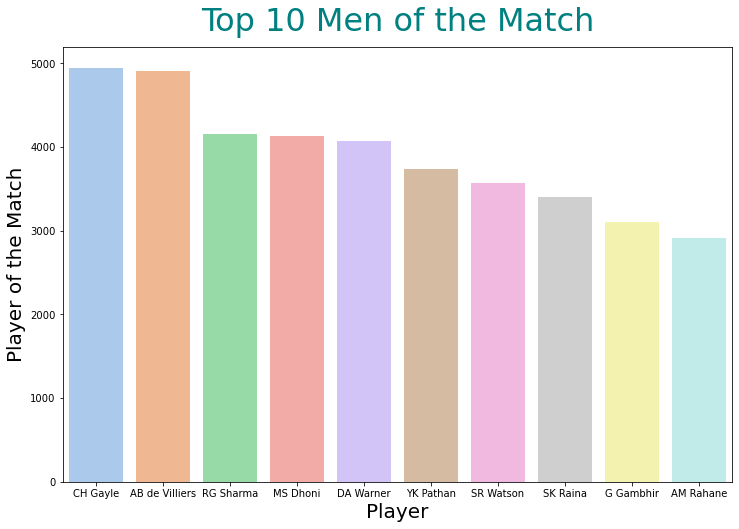

In [14]:
sns.barplot(x='Player',y='Player of the Match',data=group,palette='pastel')
plt.xlabel('Player',fontsize=20)
plt.ylabel('Player of the Match',fontsize=20)
plt.title('Top 10 Men of the Match',fontsize=32,color='teal',pad=16)
plt.show()

## Chris Gayle has won the most number of "Player of the Match" awards, closely followed by AB de Villiers.

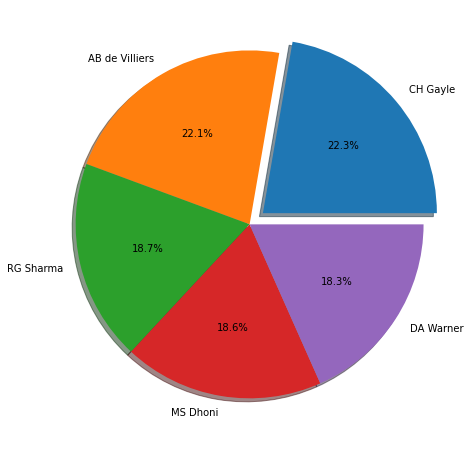

In [15]:
group = group[:5]
explode = (0.1,0,0,0,0)
plt.figure(figsize=(8,8))
plt.pie(group['Player of the Match'],labels=group['Player'],explode=explode,shadow=True,autopct='%1.1f%%')
plt.show()

## Chris Gayle has won 22.3% of the total Man of the Match awards.

## AB de Villiers has won 22.1% of the total Man of the Match awards, which is almost equal to the number of Man of the Match awards which Chris Gayle secured.

## Let's check which team has won the most number of matches.

In [16]:
winners = ipl_data['Winner'].value_counts().sort_values(ascending=False).reset_index()[:10]
winners.columns.values[0] = 'Team'
winners

,Team,Winner
0,Mumbai Indians,26305
1,Chennai Super Kings,24087
2,Kolkata Knight Riders,21644
3,Royal Challengers Bangalore,19553
4,Kings XI Punjab,19469
5,Rajasthan Royals,17948
6,Delhi Daredevils,15709
7,Sunrisers Hyderabad,13786
8,Deccan Chargers,7013
9,Gujarat Lions,3063


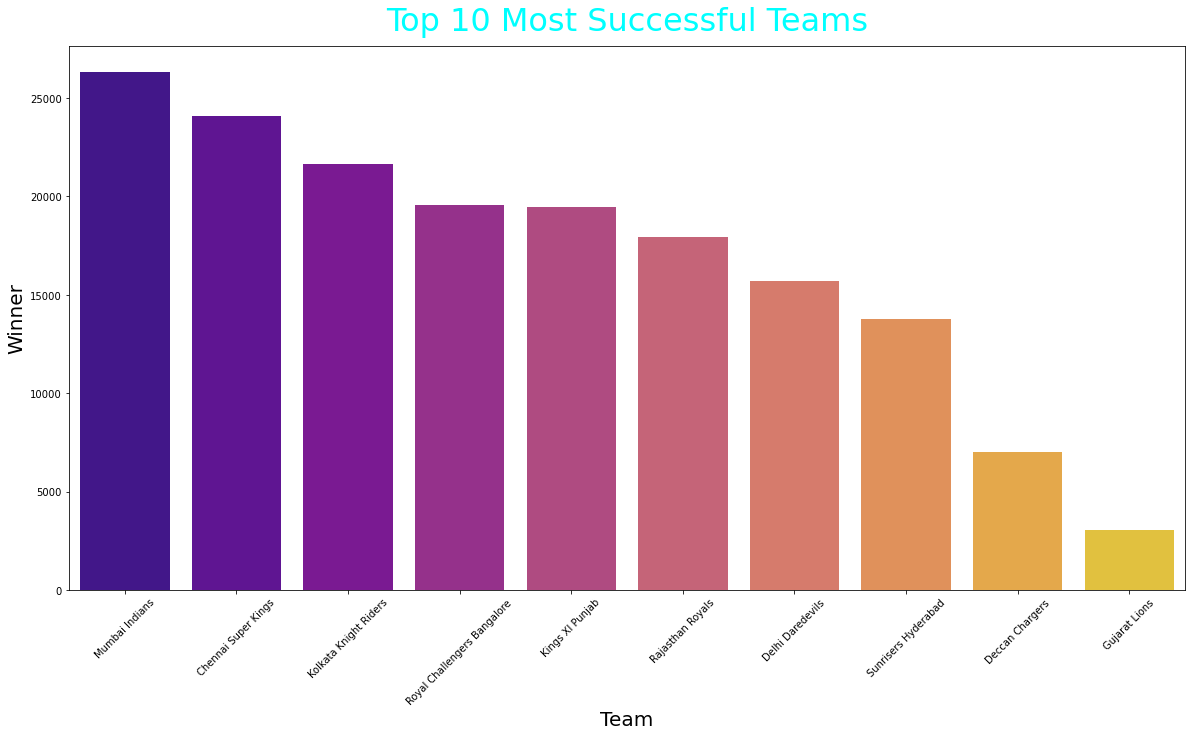

In [17]:
plt.figure(figsize=(20,10))
sns.barplot(x='Team',y='Winner',data=winners,palette='plasma')
plt.xlabel('Team',fontsize=20)
plt.ylabel('Winner',fontsize=20)
plt.xticks(rotation=45)
plt.title('Top 10 Most Successful Teams',fontsize=32,color='cyan',pad=16)
plt.show()

## Mumbai Indians is the most successful side in the IPL, with Chennai Super Kings being the second most victorious.

## Let's see which batsman has scored the most number of runs.

In [18]:
batsman_runs = ipl_data.groupby('Batsman')['Batsman Runs'].count().sort_values(ascending=False).reset_index()[:10]
batsman_runs

,Batsman,Batsman Runs
0,V Kohli,4211
1,SK Raina,4044
2,RG Sharma,3816
3,S Dhawan,3776
4,G Gambhir,3524
5,RV Uthappa,3492
6,DA Warner,3398
7,MS Dhoni,3318
8,AM Rahane,3215
9,CH Gayle,3131


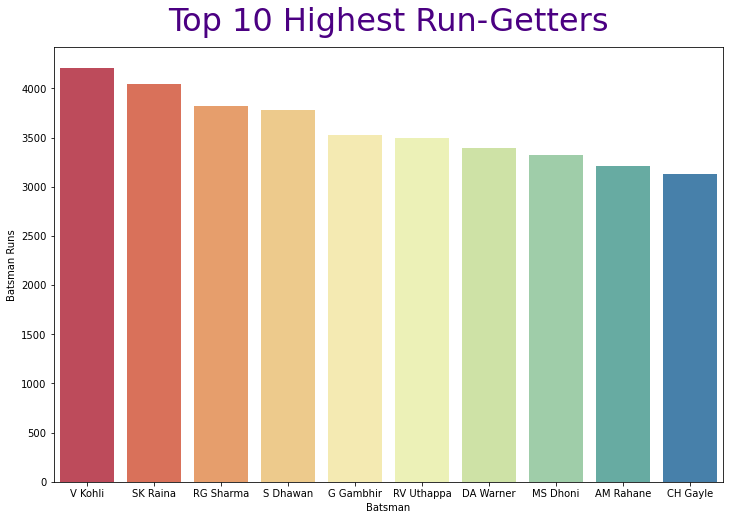

In [19]:
sns.barplot(x='Batsman',y='Batsman Runs',data=batsman_runs,palette='Spectral')
plt.title('Top 10 Highest Run-Getters',fontsize=32,color='indigo',pad=16)
plt.show()

## Virat Kohli has scored the maximum number of runs, closely followed by Suresh Raina.

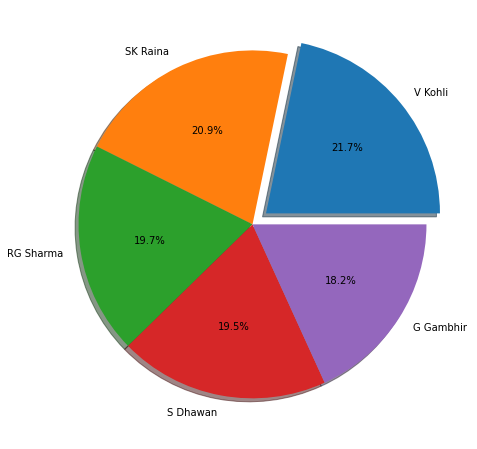

In [20]:
batsman_runs = batsman_runs[:5]
explode = (0.1,0,0,0,0)
plt.figure(figsize=(8,8))
plt.pie(batsman_runs['Batsman Runs'],labels=batsman_runs['Batsman'],explode=explode,shadow=True,autopct='%1.1f%%')
plt.show()

## Virat Kohli has scored 21.7% of total runs, while Suresh Raina scored 20.9% of them.

## Let's analyze which team has scored the most number of runs.

In [21]:
team_runs = ipl_data.groupby('Batting Team')['Total Runs'].count().sort_values(ascending=False).reset_index()[:10]
team_runs

,Batting Team,Total Runs
0,Mumbai Indians,22619
1,Kings XI Punjab,20931
2,Royal Challengers Bangalore,20908
3,Kolkata Knight Riders,20858
4,Chennai Super Kings,19762
5,Delhi Daredevils,18786
6,Rajasthan Royals,17292
7,Sunrisers Hyderabad,12908
8,Deccan Chargers,9034
9,Pune Warriors,5443


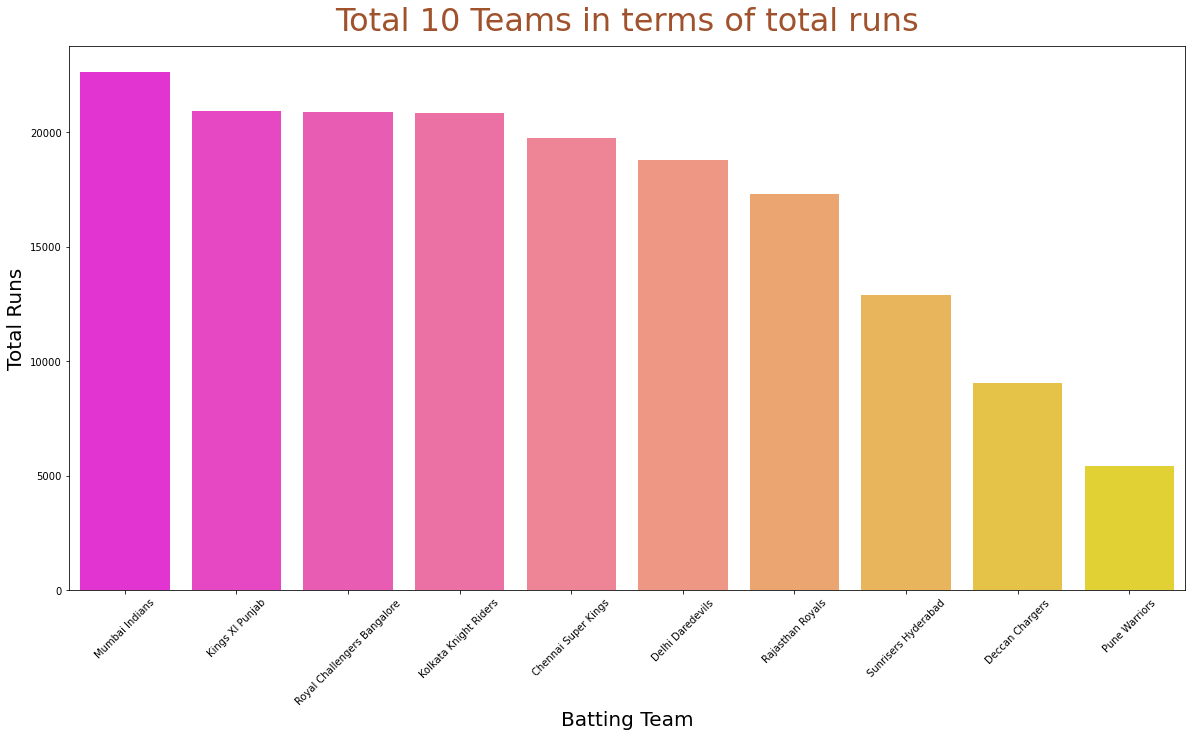

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(x='Batting Team',y='Total Runs',data=team_runs,palette='spring')
plt.xticks(rotation=45)
plt.xlabel('Batting Team',fontsize=20)
plt.ylabel('Total Runs',fontsize=20)
plt.title('Total 10 Teams in terms of total runs',fontsize=32,color='sienna',pad=16)
plt.show()

## Mumbai Indians has scored the highest number of runs, closely followed by each of Kings XI Punjab, Royal Challengers Bangalore and Kolkata Knight Riders.

## Let's analyze the match results.

In [23]:
match_results = ipl_data['Result'].value_counts().reset_index()
match_results.columns = ['Result','Count']
match_results

,Result,Count
0,normal,176372
1,tie,2334
2,no result,372


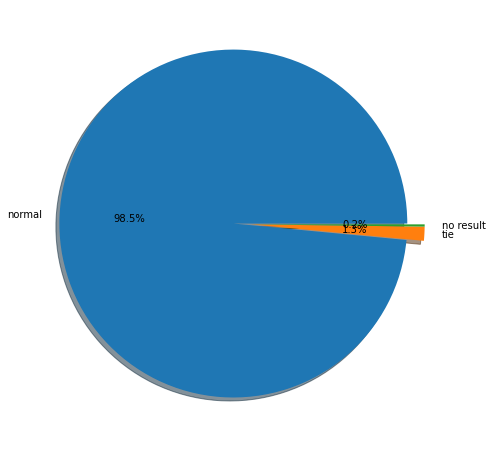

In [24]:
explode = (0.1,0,0)
plt.pie(match_results['Count'],labels=match_results['Result'],explode=explode,shadow=True,autopct='%1.1f%%')
plt.show()

## 98.5% of matches produced a result, while 1.3% and 0.2% of the matches ended in "no result" and "tie" respectively.

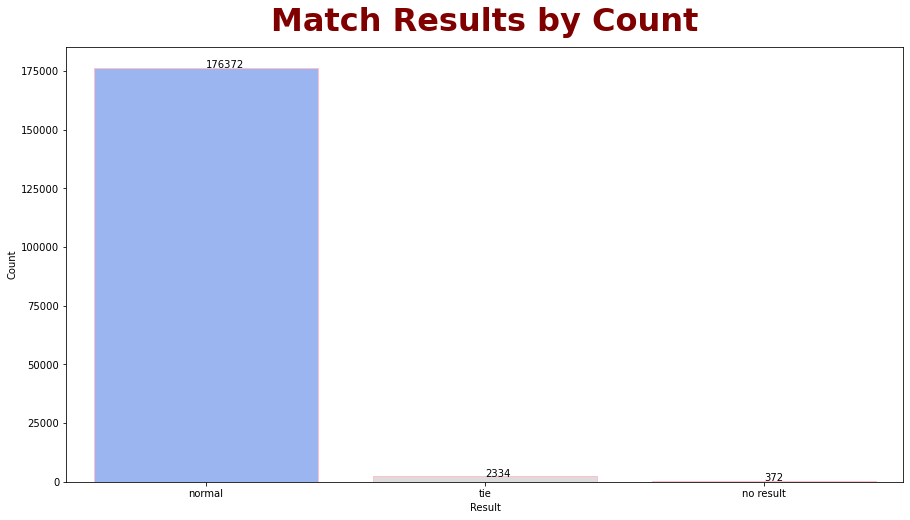

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(x='Result',y='Count',data=match_results,palette='coolwarm',edgecolor='pink')
plt.title('Match Results by Count',fontsize=32,color='maroon',pad=16,fontweight='bold')
index = match_results['Result']
count = match_results['Count']
for index,count in enumerate(count):
    plt.text(index,count,str(count))
plt.show()

## Let's find out which decision was preferred the most after winning the toss.

In [26]:
toss_decisions = ipl_data['Toss Decision'].value_counts().sort_values(ascending=False).reset_index()
toss_decisions.columns = ['Toss Decision','Count']
toss_decisions

,Toss Decision,Count
0,field,109222
1,bat,69856


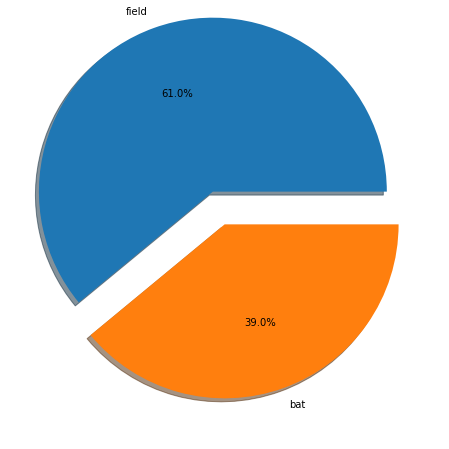

In [27]:
plt.figure(figsize=(8,8))
explode = (0.2,0)
plt.pie(toss_decisions['Count'],labels=toss_decisions['Toss Decision'],shadow=True,explode=explode,autopct='%1.1f%%')
plt.show()

## Majority of times, the teams chose to field first.

## Let's analyze which team has won the maximum number of tosses.

In [28]:
toss_winners = ipl_data['Toss Winner'].value_counts().sort_values(ascending=False).reset_index()
toss_winners.columns = ['Team','Toss Won']
toss_winners

,Team,Toss Won
0,Mumbai Indians,23536
1,Kolkata Knight Riders,21751
2,Chennai Super Kings,21328
3,Kings XI Punjab,19350
4,Royal Challengers Bangalore,18999
5,Rajasthan Royals,18924
6,Delhi Daredevils,18548
7,Sunrisers Hyderabad,10809
8,Deccan Chargers,10376
9,Pune Warriors,4798


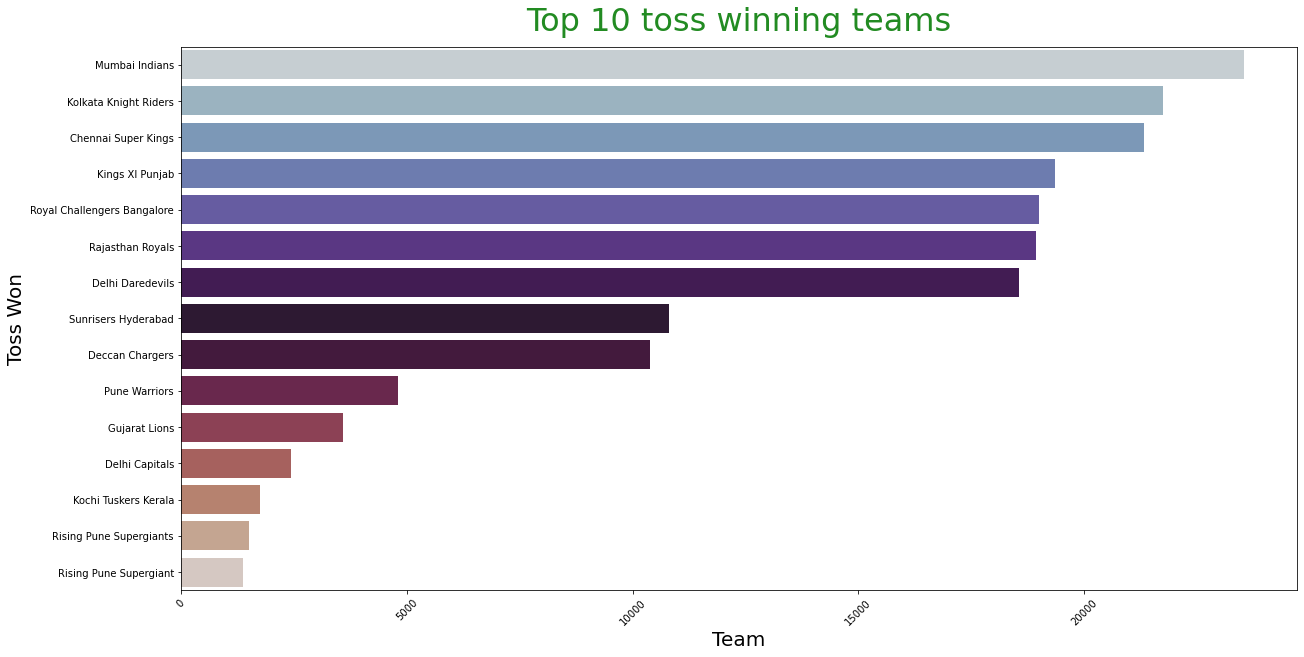

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x='Toss Won',y='Team',data=toss_winners,palette='twilight',orient='h')
plt.xticks(rotation=45)
plt.xlabel('Team',fontsize=20)
plt.ylabel('Toss Won',fontsize=20)
plt.title('Top 10 toss winning teams',fontsize=32,color='forestgreen',pad=16)
plt.show()

## Mumbai Indians have won the toss the most number of times, while Rising Pune Supergiants won it the least number of times.

## Let's analyze which venues were used the most for hosting the matches.

In [30]:
venues = ipl_data['Venue'].value_counts().sort_values(ascending=False).reset_index()[:10]
venues.columns = ['Venue','Number of Matches Hosted']
venues

,Venue,Number of Matches Hosted
0,Eden Gardens,17991
1,Wankhede Stadium,17590
2,M Chinnaswamy Stadium,16872
3,Feroz Shah Kotla,15604
4,"Rajiv Gandhi International Stadium, Uppal",13303
5,"MA Chidambaram Stadium, Chepauk",12006
6,Sawai Mansingh Stadium,11158
7,"Punjab Cricket Association Stadium, Mohali",8266
8,Maharashtra Cricket Association Stadium,5055
9,Subrata Roy Sahara Stadium,4064


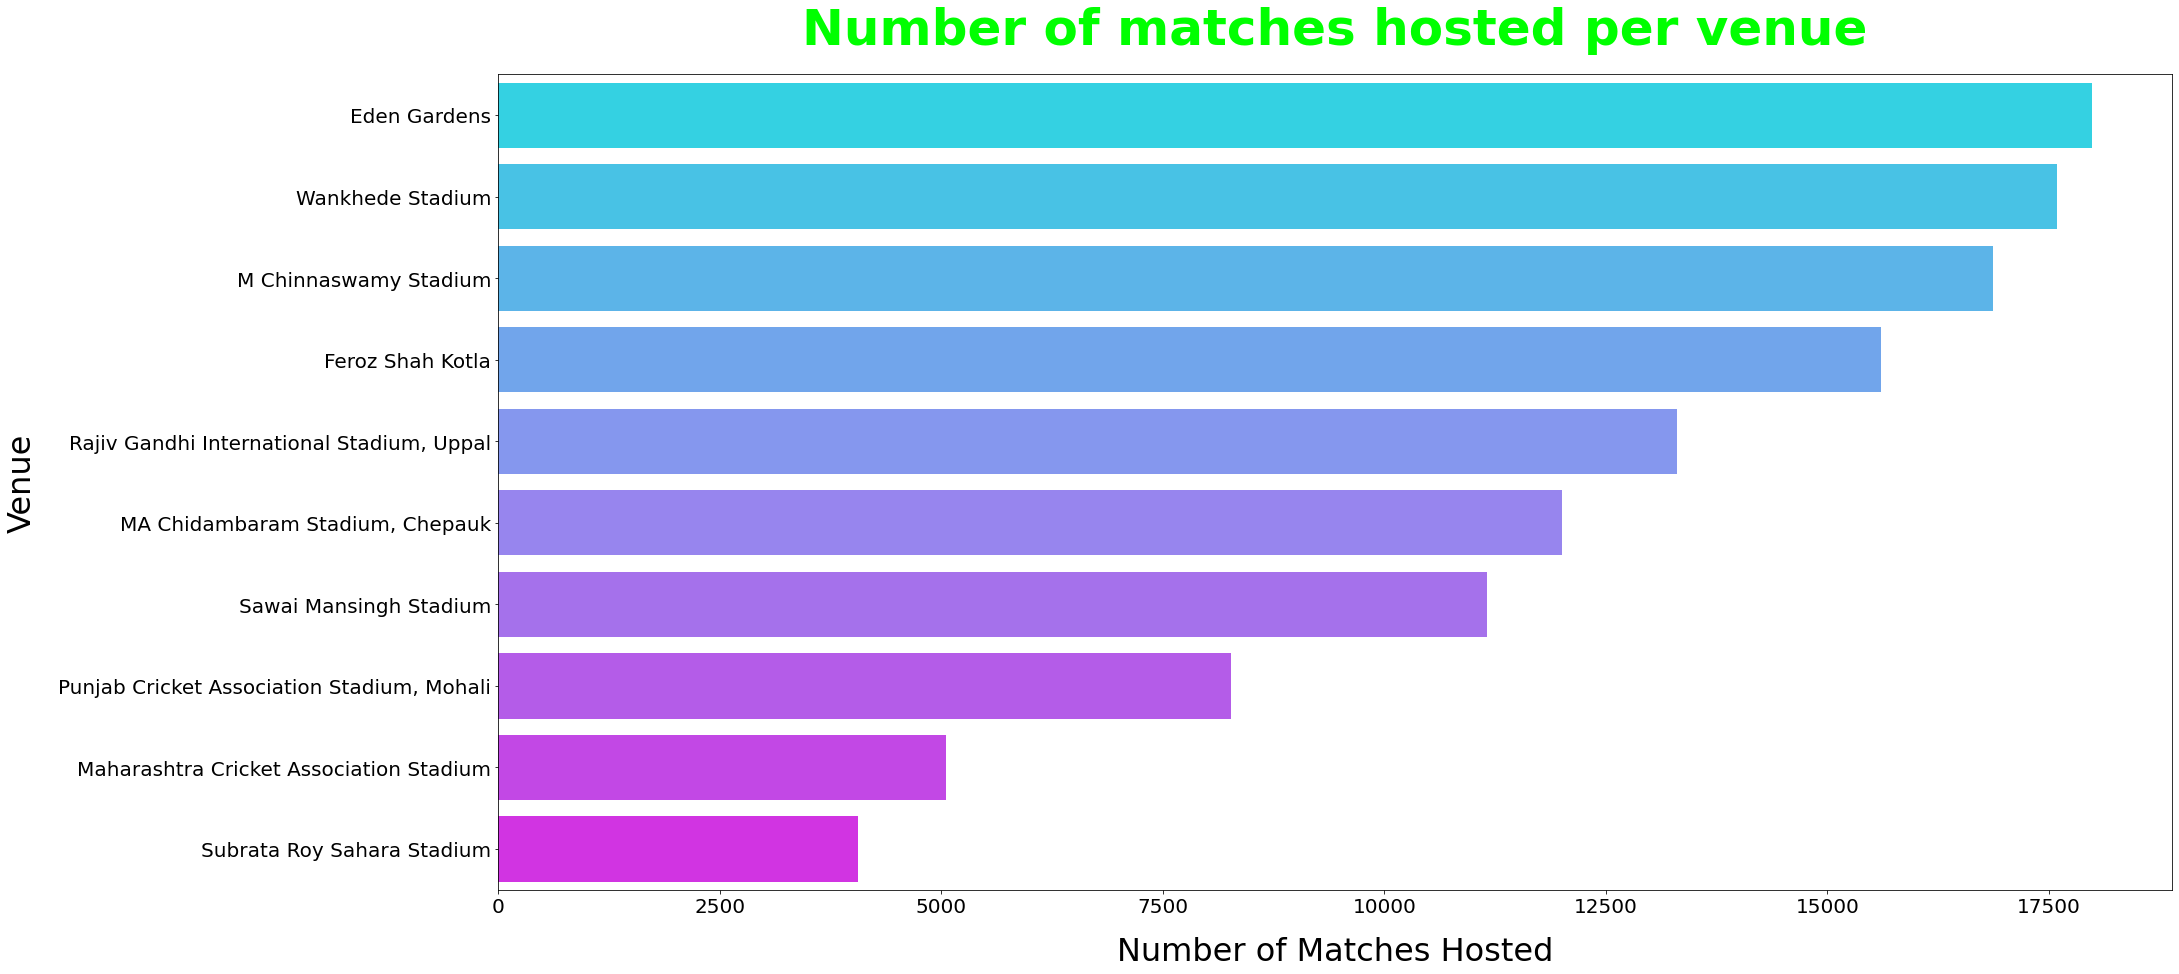

In [31]:
plt.figure(figsize=(30,15))
sns.barplot(x='Number of Matches Hosted',y='Venue',data=venues,palette='cool',orient="h")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Matches Hosted',fontsize=32,labelpad=20)
plt.ylabel('Venue',fontsize=32,labelpad=20)
plt.title('Number of matches hosted per venue',fontsize=50,color='lime',fontweight='bold',pad=30)
plt.show()

## Eden Gardens has hosted the highest number of matches among all available stadiums.

## Let's find the total number of matches won by batting and bowling first across all seasons.

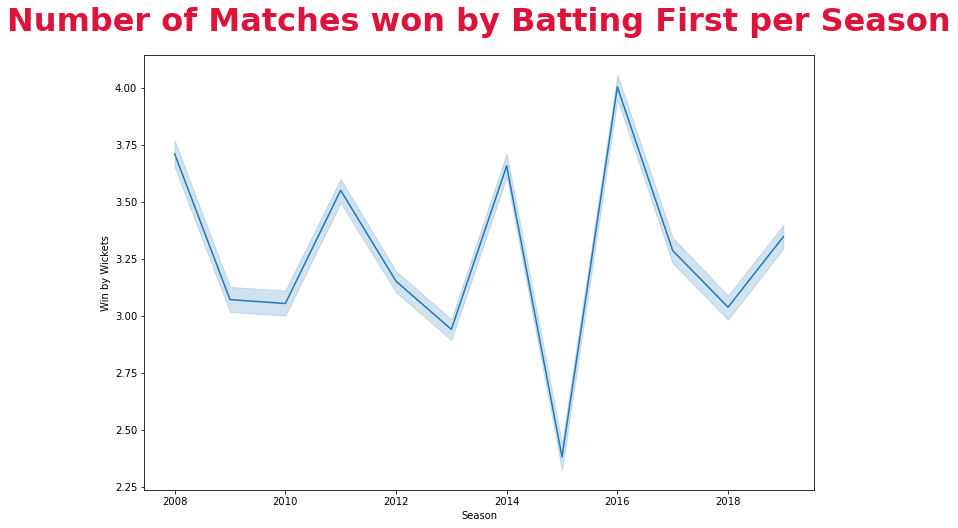

In [32]:
sns.lineplot(x='Season',y='Win by Wickets',data=ipl_data,palette='flare')
plt.title('Number of Matches won by Batting First per Season',fontsize=32,color='crimson',fontweight='bold',pad=24)
plt.show()

## In the 2016 season, maximum number of matches were won by batting first, while in 2015, minimum number of matches were won by doing so.

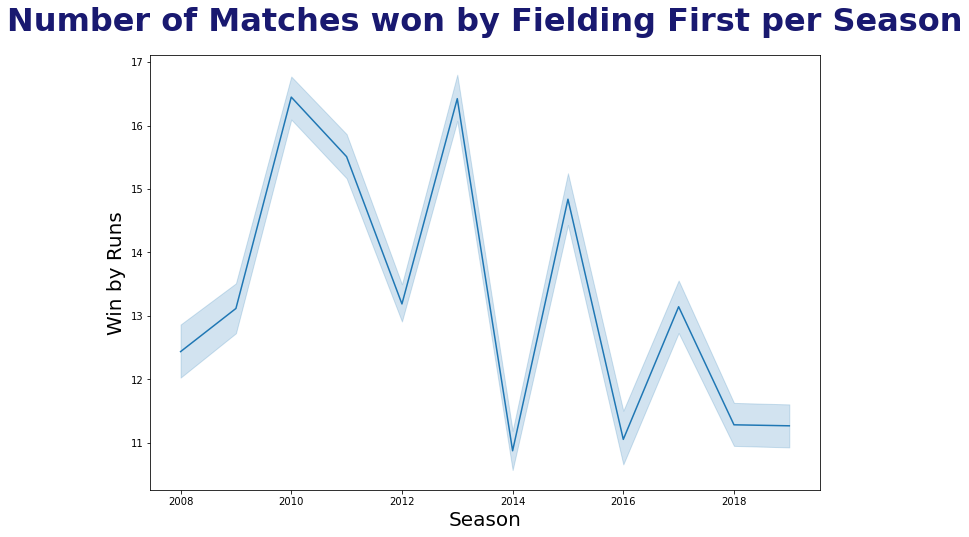

In [33]:
sns.lineplot(x='Season',y='Win by Runs',data=ipl_data,palette='flare')
plt.xlabel('Season',fontsize=20)
plt.ylabel('Win by Runs',fontsize=20)
plt.title('Number of Matches won by Fielding First per Season',fontsize=32,color='midnightblue',fontweight='bold',pad=24)
plt.show()

## Maximum number of matches were won by batting first in the seasons 2010 and 2013.

## Let's find out the most popular kind of dismissal among all types of dismissal.

In [34]:
dismissal_types = ipl_data['Dismissal Kind'].value_counts().sort_values(ascending=False).reset_index()
dismissal_types.columns = ['Dismissal Kind','Count']
dismissal_types

,Dismissal Kind,Count
0,caught,5348
1,bowled,1581
2,run out,852
3,lbw,540
4,stumped,278
5,caught and bowled,211
6,retired hurt,12
7,hit wicket,10
8,obstructing the field,2


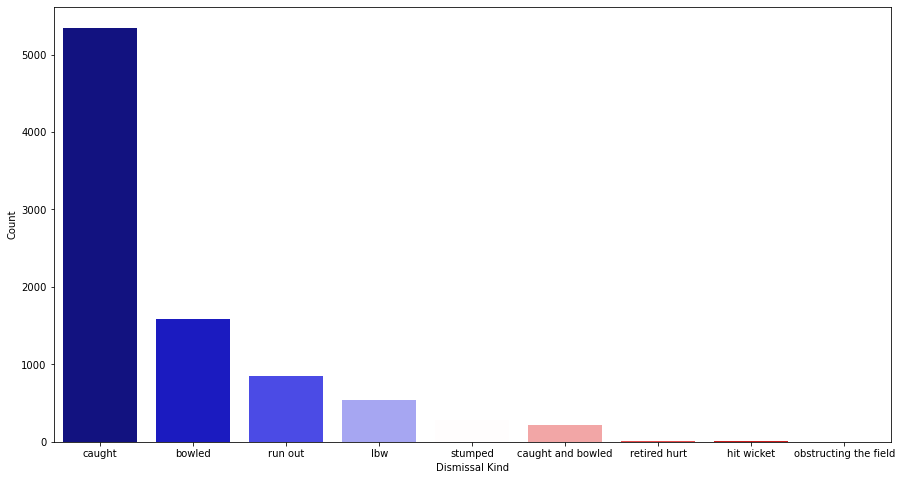

In [35]:
plt.figure(figsize=(15,8))
sns.barplot(x='Dismissal Kind',y='Count',data=dismissal_types,palette='seismic')
plt.show()

## "Caught" is the most popular type of dismissal across all seasons of IPL.

## Let's analyze which player has been dismissed the most number of times.

In [36]:
player_dismissals = ipl_data['Player Dismissed'].value_counts().sort_values(ascending=False).reset_index()[:10]
player_dismissals.columns = ['Player','Number of Dismissals']
player_dismissals

,Player,Number of Dismissals
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137
5,G Gambhir,136
6,KD Karthik,135
7,PA Patel,126
8,AM Rahane,116
9,AT Rayudu,115


## Suresh Raina has been dismissed the most, closely followed by Rohit Sharma and Robin Uthappa.

## Let's visualize it as well.

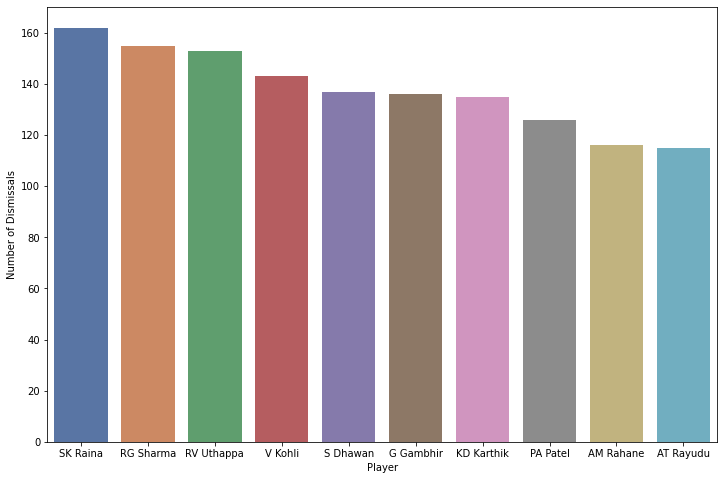

In [37]:
sns.barplot(x='Player',y='Number of Dismissals',data=player_dismissals,palette='deep')
plt.show()

## Let's analyze the total number of matches won by teams while batting first or bowling first after winning the toss.

In [38]:
won_toss_bat_first = ipl_data[ipl_data['Toss Decision']=='bat']
won_toss_field_first = ipl_data[ipl_data['Toss Decision']=='field']

In [39]:
won_toss_bat_first_won_by_runs = won_toss_bat_first[won_toss_bat_first['Win by Runs']!=0]
won_toss_bat_first_won_by_wickets = won_toss_bat_first[won_toss_bat_first['Win by Wickets']!=0]
won_toss_field_first_won_by_runs = won_toss_field_first[won_toss_field_first['Win by Runs']!=0]
won_toss_field_first_won_by_wickets = won_toss_field_first[won_toss_field_first['Win by Wickets']!=0]

# Case-Wise Analysis

# Let's analyze the teams which won the toss, chose to bat first and won by some runs.

## Let's notice which team scored the most number of runs in this case.

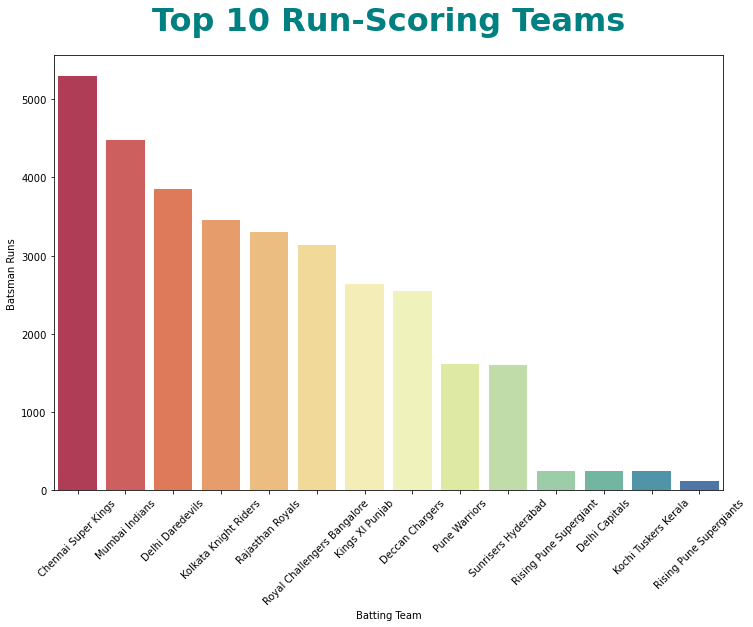

In [40]:
catg1 = won_toss_bat_first_won_by_runs.groupby('Batting Team')['Batsman Runs'].count().sort_values(ascending=False).reset_index()
sns.barplot(x='Batting Team',y='Batsman Runs',data=catg1,palette='Spectral')
plt.xticks(rotation=45)
plt.title('Top 10 Run-Scoring Teams',fontsize=32,color='teal',fontweight='bold',pad=25)
plt.show()

## Chennai Super Kings' batsmen have scored the most number of runs while batting first.

## Let's analyze which teams have won the most tosses in this case.

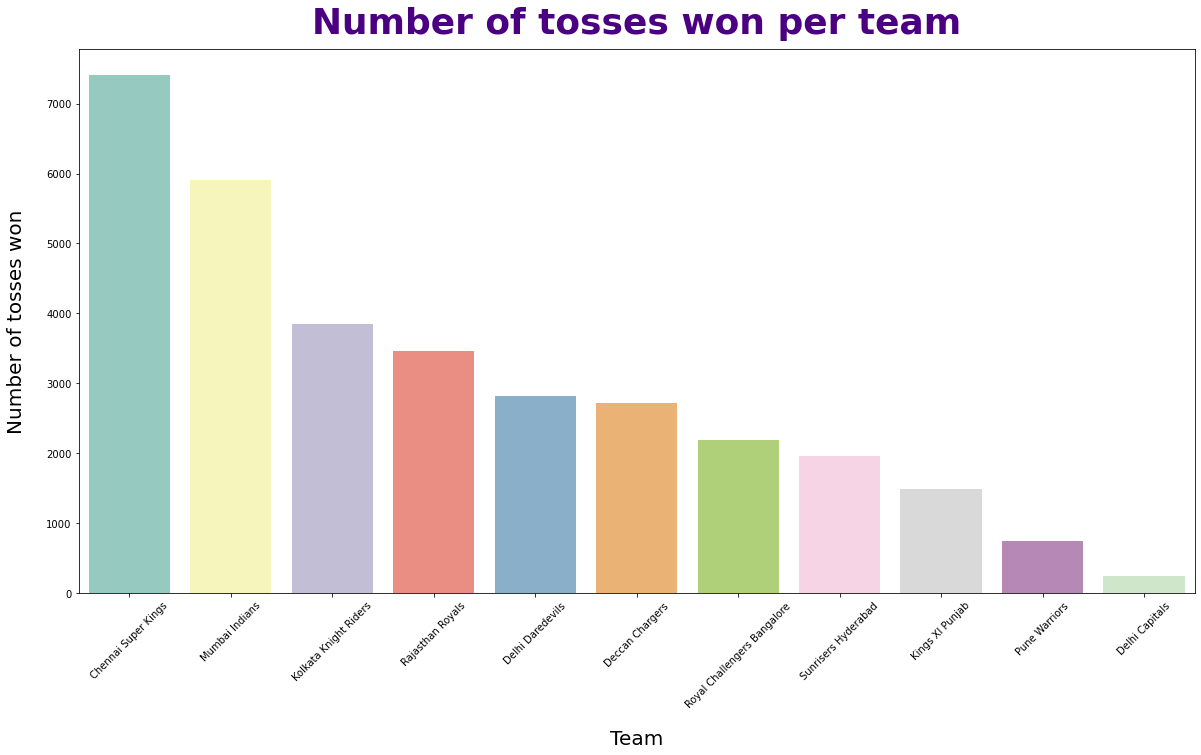

In [41]:
teams = won_toss_bat_first_won_by_runs['Toss Winner'].value_counts().sort_values(ascending=False).keys()
tosses_won = won_toss_bat_first_won_by_runs['Toss Winner'].value_counts().sort_values(ascending=False).values  
frame = {'Team': teams, 'Number of tosses won': tosses_won}
teams_tosses = pd.DataFrame(frame)
plt.figure(figsize=(20,10))
sns.barplot(x='Team',y='Number of tosses won',data=teams_tosses,palette='Set3')
plt.xlabel('Team',fontsize=20,labelpad=20)
plt.ylabel('Number of tosses won',fontsize=20,labelpad=20)
plt.xticks(rotation=45)
plt.title('Number of tosses won per team',fontsize=36,color='indigo',pad=16,fontweight='bold')
plt.show()

## Chennai Super Kings chose to bat the highest number of times after winning a toss.

## Let's observe which team won the most number of matches in this case.

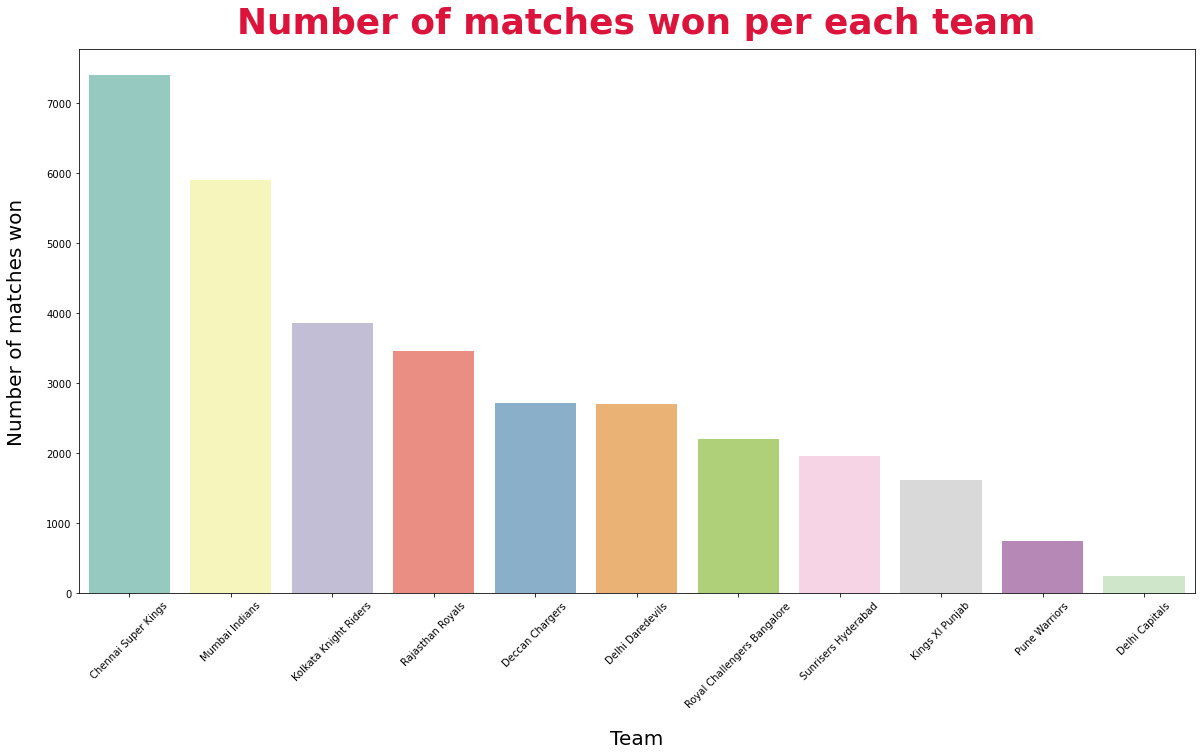

In [42]:
teams = won_toss_bat_first_won_by_runs['Winner'].value_counts().sort_values(ascending=False).keys()
tosses_won = won_toss_bat_first_won_by_runs['Winner'].value_counts().sort_values(ascending=False).values  
frame = {'Team': teams, 'Number of matches won': tosses_won}
teams_tosses = pd.DataFrame(frame)
plt.figure(figsize=(20,10))
sns.barplot(x='Team',y='Number of matches won',data=teams_tosses,palette='Set3')
plt.xlabel('Team',fontsize=20,labelpad=20)
plt.ylabel('Number of matches won',fontsize=20,labelpad=20)
plt.xticks(rotation=45)
plt.title('Number of matches won per each team',fontsize=36,color='crimson',pad=16,fontweight='bold')
plt.show()

## Chennai Super Kings have won the most number of matches by some runs in which they bat first after winning the toss.

## Let's see which batsman scored the maximum number of runs in this case.

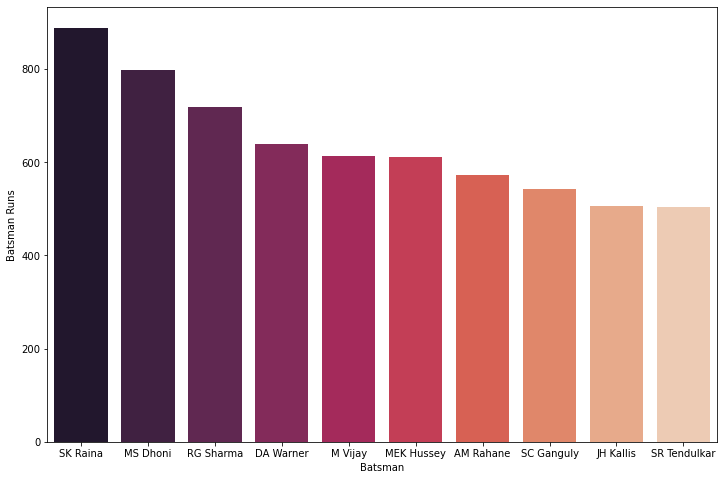

In [43]:
bat_first = won_toss_bat_first_won_by_runs.groupby('Batsman')['Batsman Runs'].count().sort_values(ascending=False).reset_index()[:10]
sns.barplot(x='Batsman',y='Batsman Runs',data=bat_first,palette='rocket')
plt.show()

## In case of batting first and setting a score, Suresh Raina has scored the maximum number of runs while Sachin Tendulkar has scored minimum number of runs.

# Let's evaluate the case when teams won the toss, chose to bat first and won by some wickets.

## Let's find the top 10 run aggregators in this case.

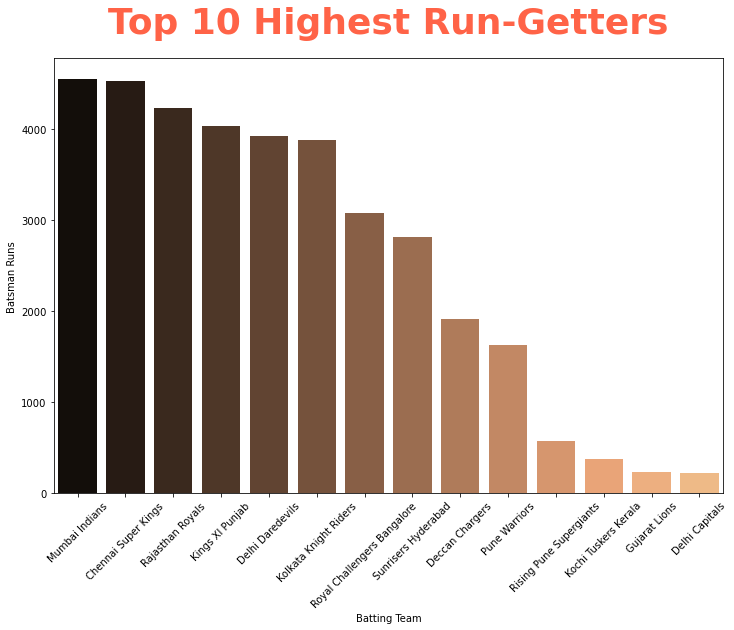

In [44]:
catg1 = won_toss_bat_first_won_by_wickets.groupby('Batting Team')['Batsman Runs'].count().sort_values(ascending=False).reset_index()
sns.barplot(x='Batting Team',y='Batsman Runs',data=catg1,palette='copper')
plt.xticks(rotation=45)
plt.title('Top 10 Highest Run-Getters',fontsize=36,fontweight='bold',pad=25,color='tomato')
plt.show()

## Mumbai Indians have scored the maximum number of runs while batting first in the matches which they win by some wickets. Same can be said for Chennai Super Kings as well.

## Let's perceive which team won the most number of tosses in this case.

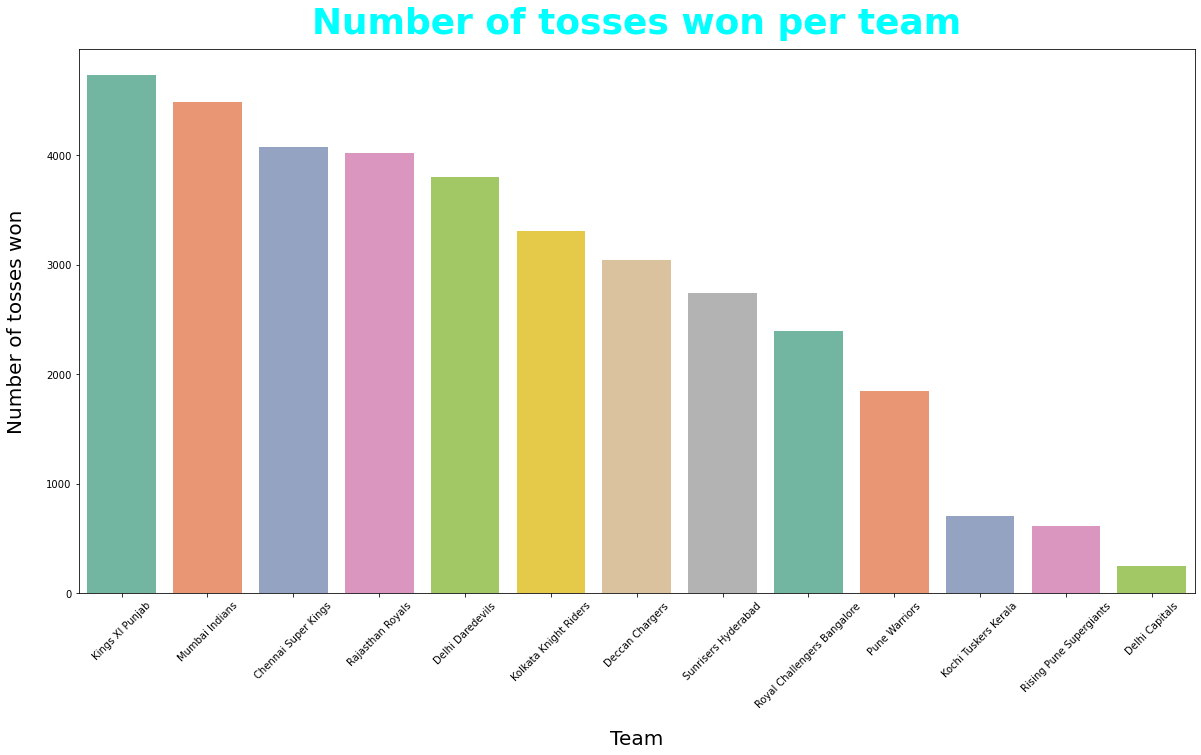

In [45]:
teams = won_toss_bat_first_won_by_wickets['Toss Winner'].value_counts().sort_values(ascending=False).keys()
tosses_won = won_toss_bat_first_won_by_wickets['Toss Winner'].value_counts().sort_values(ascending=False).values  
frame = {'Team': teams, 'Number of tosses won': tosses_won}
teams_tosses = pd.DataFrame(frame)
plt.figure(figsize=(20,10))
sns.barplot(x='Team',y='Number of tosses won',data=teams_tosses,palette='Set2')
plt.xlabel('Team',fontsize=20,labelpad=20)
plt.ylabel('Number of tosses won',fontsize=20,labelpad=20)
plt.xticks(rotation=45)
plt.title('Number of tosses won per team',fontsize=36,color='cyan',pad=16,fontweight='bold')
plt.show()

## Kings XI Punjab have the highest probability of winning the matches by wickets, whenever they win the toss and choose to field first, closely followed by Mumbai Indians.

## Let's check which team won the most matches in this case.

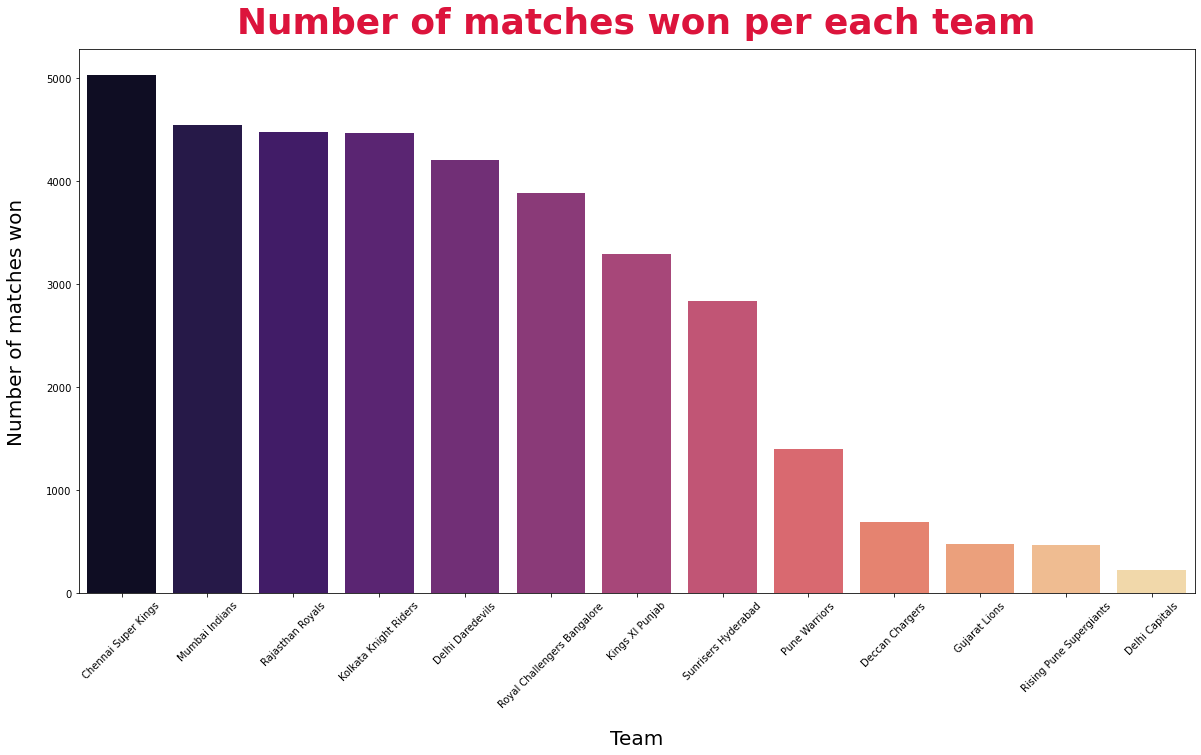

In [46]:
teams = won_toss_bat_first_won_by_wickets['Winner'].value_counts().sort_values(ascending=False).keys()
tosses_won = won_toss_bat_first_won_by_wickets['Winner'].value_counts().sort_values(ascending=False).values  
frame = {'Team': teams, 'Number of matches won': tosses_won}
teams_tosses = pd.DataFrame(frame)
plt.figure(figsize=(20,10))
sns.barplot(x='Team',y='Number of matches won',data=teams_tosses,palette='magma')
plt.xlabel('Team',fontsize=20,labelpad=20)
plt.ylabel('Number of matches won',fontsize=20,labelpad=20)
plt.xticks(rotation=45)
plt.title('Number of matches won per each team',fontsize=36,color='crimson',pad=16,fontweight='bold')
plt.show()

## Chennai Super Kings have won the highest number of matches by wickets after winning the toss and choosing to bat first.

## Let's observe the top 10 highest run scorers in this case.

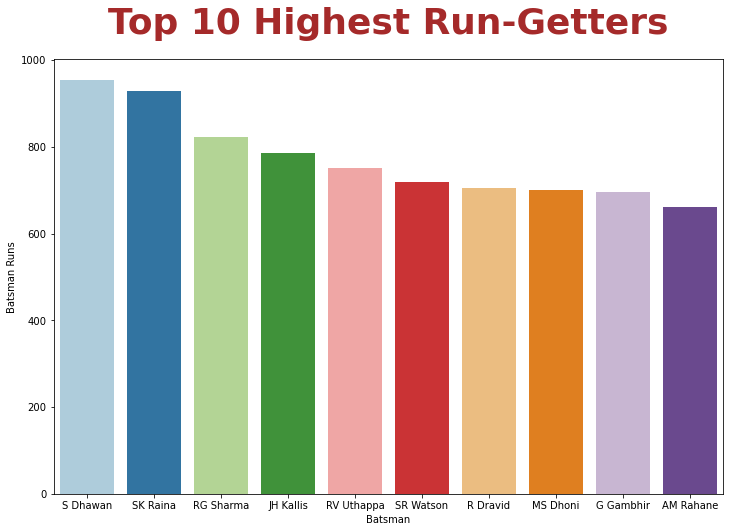

In [47]:
bat_first = won_toss_bat_first_won_by_wickets.groupby('Batsman')['Batsman Runs'].count().sort_values(ascending=False).reset_index()[:10]
sns.barplot(x='Batsman',y='Batsman Runs',data=bat_first,palette='Paired')
plt.title('Top 10 Highest Run-Getters',fontsize=36,fontweight='bold',pad=25,color='brown')
plt.show()

## Shikhar Dhawan has scored the most number of runs while batting first. 

# Let's examine the case when teams won the toss, chose to field first and won the match by some runs.

## Let's observe the top 10 run-scoring teams in this case.

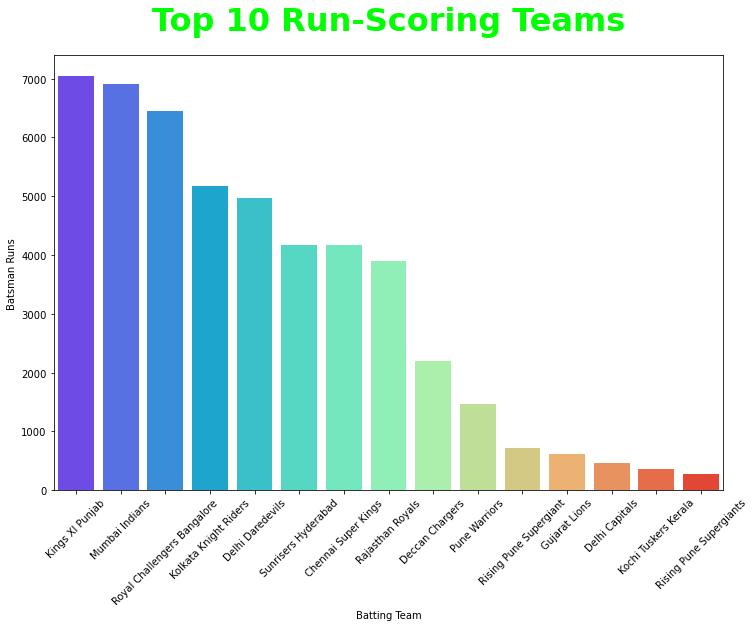

In [48]:
catg1 = won_toss_field_first_won_by_runs.groupby('Batting Team')['Batsman Runs'].count().sort_values(ascending=False).reset_index()
sns.barplot(x='Batting Team',y='Batsman Runs',data=catg1,palette='rainbow')
plt.xticks(rotation=45)
plt.title('Top 10 Run-Scoring Teams',fontsize=32,color='lime',fontweight='bold',pad=25)
plt.show()

## Kings XI Punjab batsmen have scored the most number of runs whenever their team chose to field first and won the match by some runs, closely followed by Mumbai Indians.

## Let's find which team won the most number of tosses in this case.

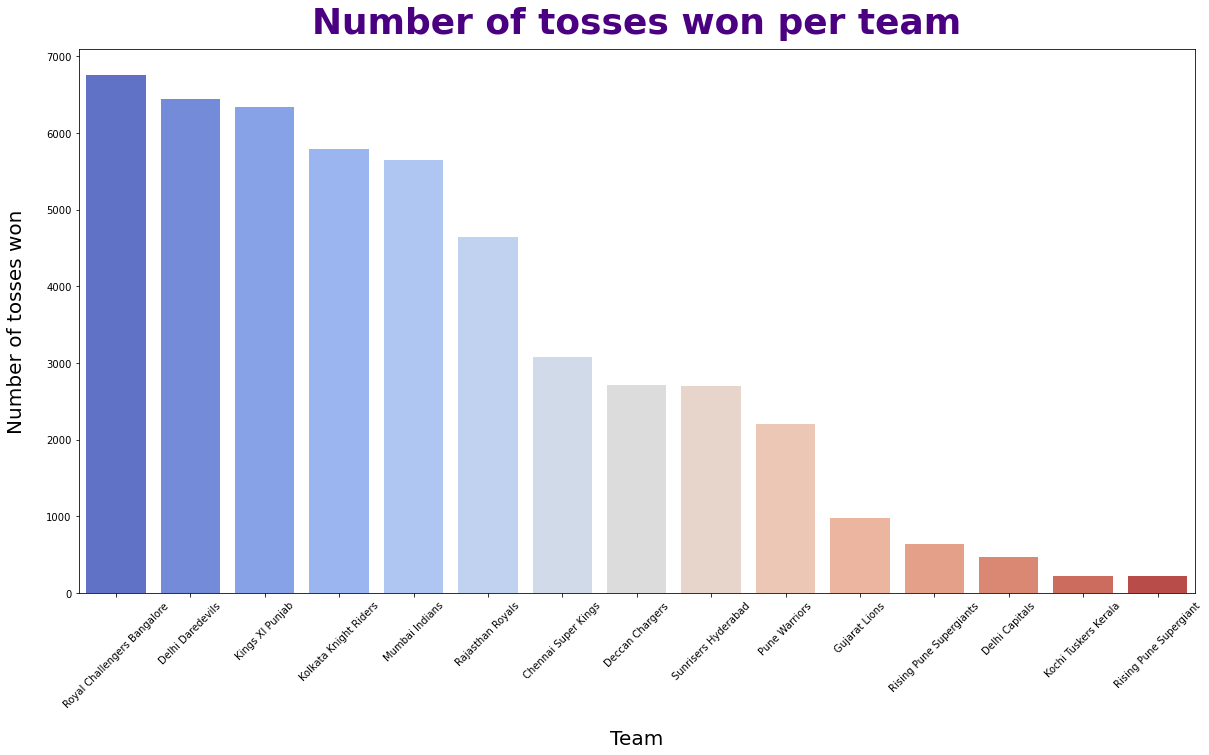

In [49]:
teams = won_toss_field_first_won_by_runs['Toss Winner'].value_counts().sort_values(ascending=False).keys()
tosses_won = won_toss_field_first_won_by_runs['Toss Winner'].value_counts().sort_values(ascending=False).values  
frame = {'Team': teams, 'Number of tosses won': tosses_won}
teams_tosses = pd.DataFrame(frame)
plt.figure(figsize=(20,10))
sns.barplot(x='Team',y='Number of tosses won',data=teams_tosses,palette='coolwarm')
plt.xlabel('Team',fontsize=20,labelpad=20)
plt.ylabel('Number of tosses won',fontsize=20,labelpad=20)
plt.xticks(rotation=45)
plt.title('Number of tosses won per team',fontsize=36,color='indigo',pad=16,fontweight='bold')
plt.show()

## Royal Challengers Bangalore have won the majority of tosses while electing to field first and winning by some run margin, closely followed by Delhi Daredevils and Kings XI Punjab.

## Let's detect which team won the most matches in this case.

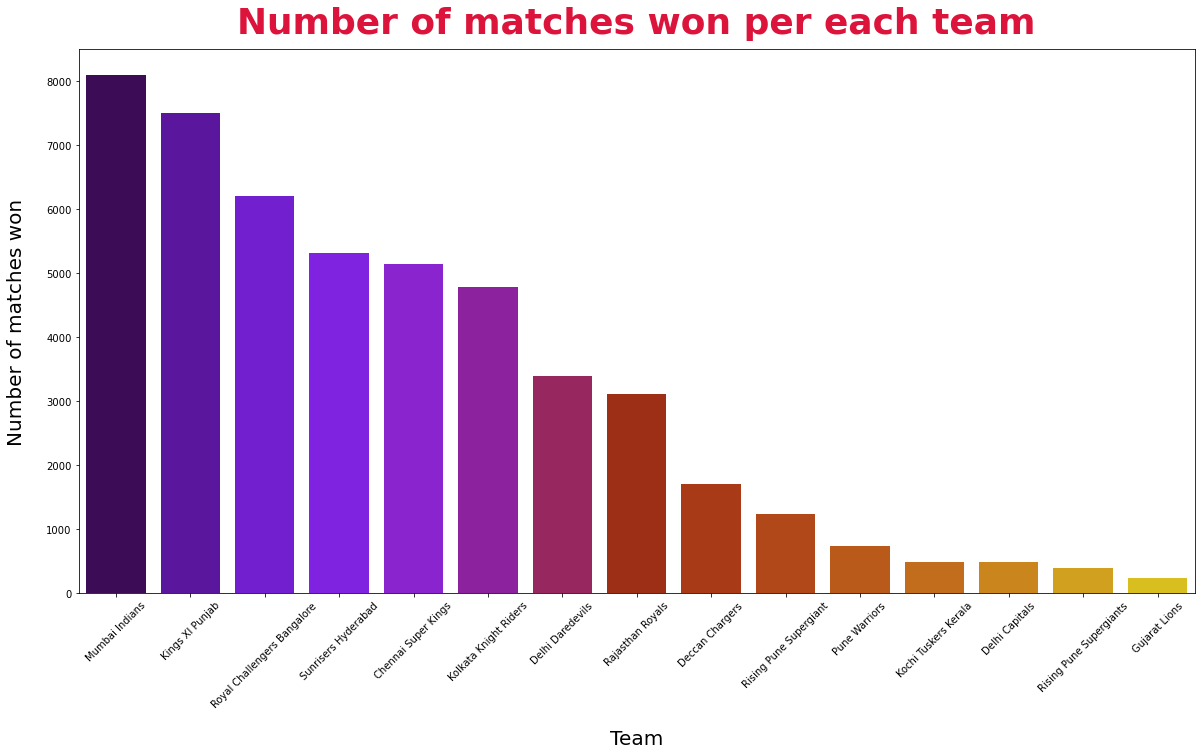

In [50]:
teams = won_toss_field_first_won_by_runs['Winner'].value_counts().sort_values(ascending=False).keys()
tosses_won = won_toss_field_first_won_by_runs['Winner'].value_counts().sort_values(ascending=False).values  
frame = {'Team': teams, 'Number of matches won': tosses_won}
teams_tosses = pd.DataFrame(frame)
plt.figure(figsize=(20,10))
sns.barplot(x='Team',y='Number of matches won',data=teams_tosses,palette='gnuplot')
plt.xlabel('Team',fontsize=20,labelpad=20)
plt.ylabel('Number of matches won',fontsize=20,labelpad=20)
plt.xticks(rotation=45)
plt.title('Number of matches won per each team',fontsize=36,color='crimson',pad=16,fontweight='bold')
plt.show()

## Mumbai Indians have won maximum number of matches while fielding first, closely followed by Kings XI Punjab.

## Let's check the top 10 run-scorers in this case.

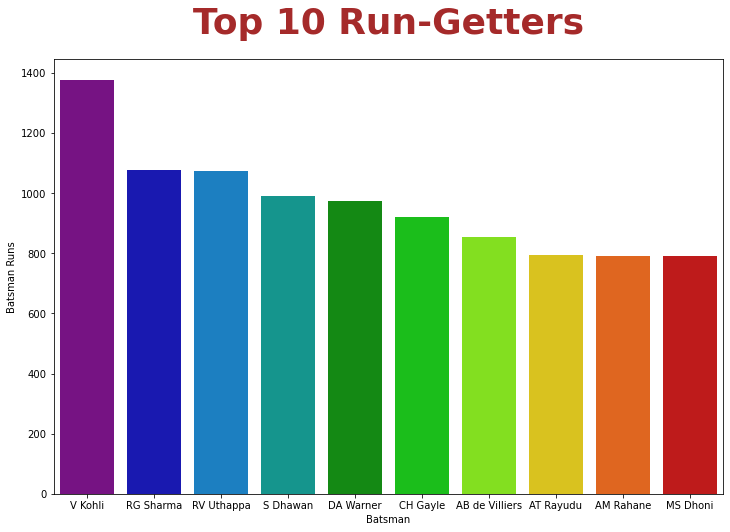

In [51]:
bat_first = won_toss_field_first_won_by_runs.groupby('Batsman')['Batsman Runs'].count().sort_values(ascending=False).reset_index()[:10]
sns.barplot(x='Batsman',y='Batsman Runs',data=bat_first,palette='nipy_spectral')
plt.title('Top 10 Run-Getters',fontsize=36,fontweight='bold',pad=25,color='brown')
plt.show()

## Virat Kohli has scored majority of runs while chasing a target.

# Let's examine the final case when teams won the toss, chose to field first and then won the match by some wickets.

## Let's notice the top 10 run scoring teams in this case.

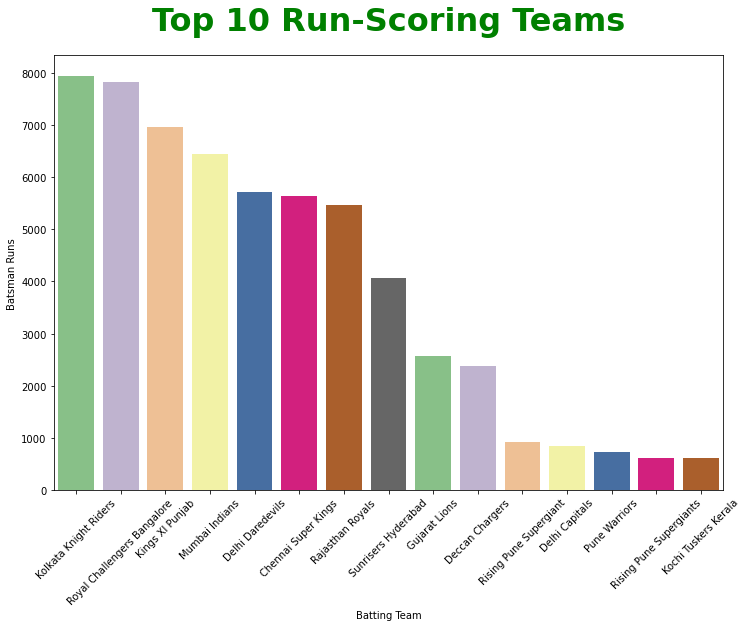

In [52]:
catg1 = won_toss_field_first_won_by_wickets.groupby('Batting Team')['Batsman Runs'].count().sort_values(ascending=False).reset_index()
sns.barplot(x='Batting Team',y='Batsman Runs',data=catg1,palette='Accent')
plt.xticks(rotation=45)
plt.title('Top 10 Run-Scoring Teams',fontsize=32,color='green',fontweight='bold',pad=25)
plt.show()

## Batsmen of Kolkata Knight Riders have scored the most number of runs, while chasing a target, closely followed by Royal Challengers Bangalore.

## Let's check which team won the most number of tosses in this case.

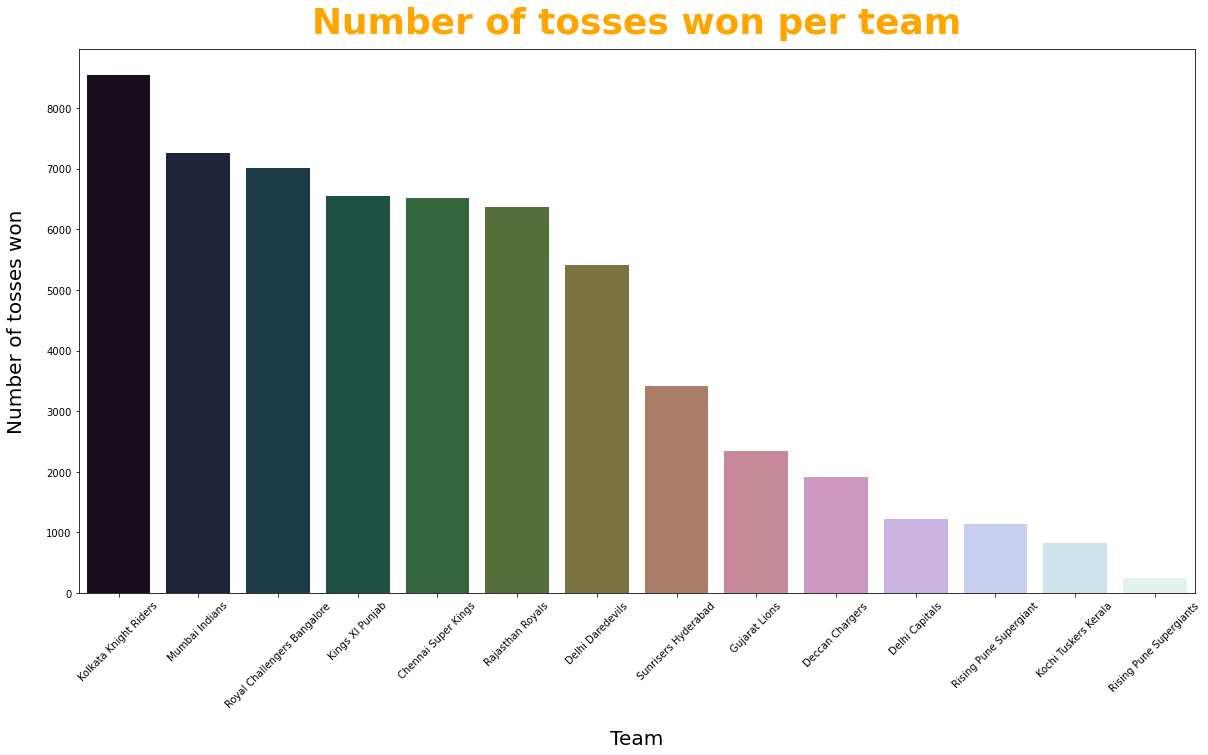

In [53]:
teams = won_toss_field_first_won_by_wickets['Toss Winner'].value_counts().sort_values(ascending=False).keys()
tosses_won = won_toss_field_first_won_by_wickets['Toss Winner'].value_counts().sort_values(ascending=False).values  
frame = {'Team': teams, 'Number of tosses won': tosses_won}
teams_tosses = pd.DataFrame(frame)
plt.figure(figsize=(20,10))
sns.barplot(x='Team',y='Number of tosses won',data=teams_tosses,palette='cubehelix')
plt.xlabel('Team',fontsize=20,labelpad=20)
plt.ylabel('Number of tosses won',fontsize=20,labelpad=20)
plt.xticks(rotation=45)
plt.title('Number of tosses won per team',fontsize=36,color='orange',pad=16,fontweight='bold')
plt.show()

## Kolkata Knight Riders have elected to field first the most number of times after winning a toss.

## Let's discover which team won the most number of matches in this case.

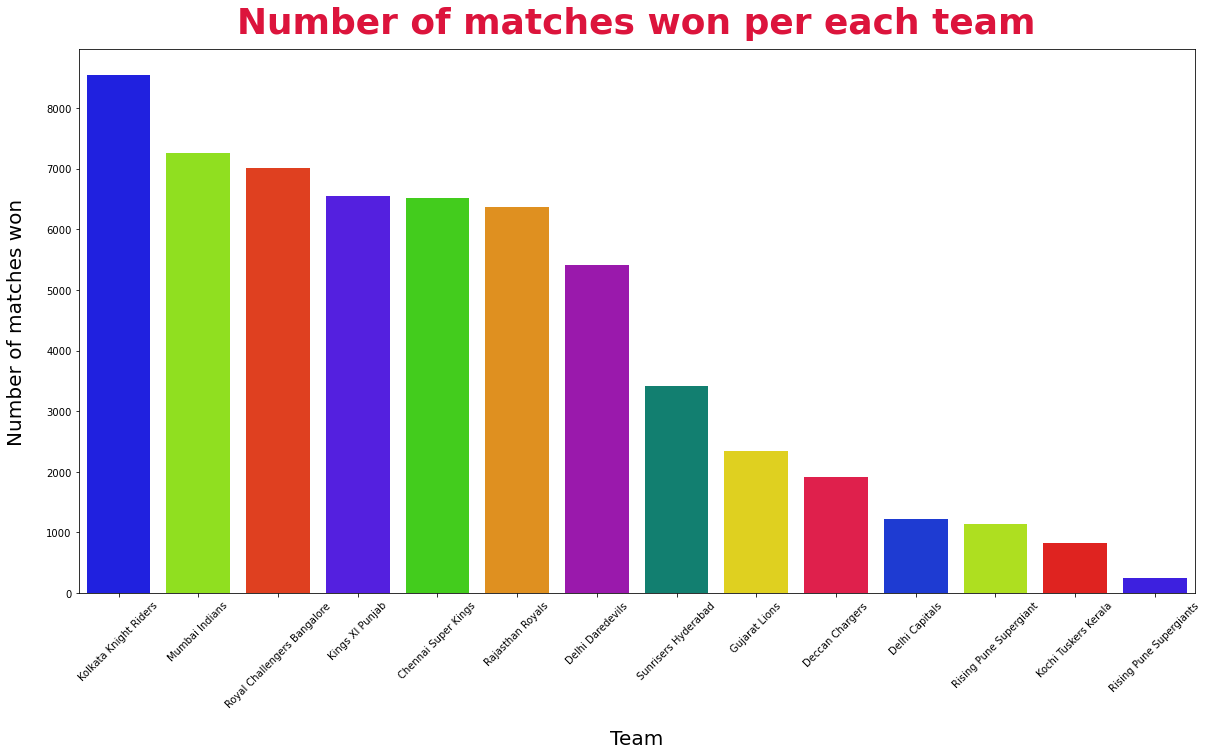

In [54]:
teams = won_toss_field_first_won_by_wickets['Winner'].value_counts().sort_values(ascending=False).keys()
tosses_won = won_toss_field_first_won_by_wickets['Winner'].value_counts().sort_values(ascending=False).values  
frame = {'Team': teams, 'Number of matches won': tosses_won}
teams_tosses = pd.DataFrame(frame)
plt.figure(figsize=(20,10))
sns.barplot(x='Team',y='Number of matches won',data=teams_tosses,palette='prism')
plt.xlabel('Team',fontsize=20,labelpad=20)
plt.ylabel('Number of matches won',fontsize=20,labelpad=20)
plt.xticks(rotation=45)
plt.title('Number of matches won per each team',fontsize=36,color='crimson',pad=16,fontweight='bold')
plt.show()

## Kolkata Knight Riders have won the most number of matches while chasing in which they elect to field first after winning the toss.

## Let's perceive the top 10 run scorers in this case.

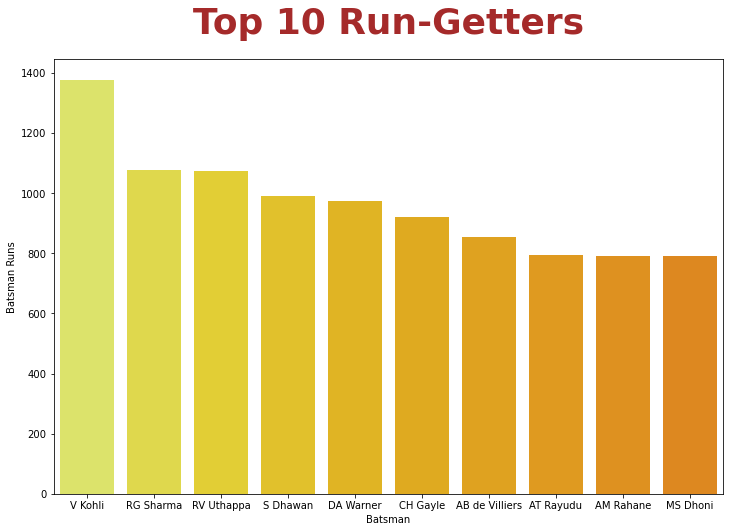

In [55]:
bat_first = won_toss_field_first_won_by_runs.groupby('Batsman')['Batsman Runs'].count().sort_values(ascending=False).reset_index()[:10]
sns.barplot(x='Batsman',y='Batsman Runs',data=bat_first,palette='Wistia')
plt.title('Top 10 Run-Getters',fontsize=36,fontweight='bold',pad=25,color='brown')
plt.show()

## Virat Kohli is way ahead in the list of highest run-getters which clearly shows that he is the chasing master of IPL.

## Let's extract the final matches of the season.

In [56]:
final_matches = ipl_data.drop_duplicates(subset=['Season'],keep='last')
final_matches[['Season','Winner']].reset_index(drop=True).sort_values('Season')

,Season,Winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


## Let's check how many seasons have teams won.

In [57]:
final_matches['Winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: Winner, dtype: int64

## Mumbai Indians have been the most successful team, as they have won the maximum number of seasons. Chennai Super Kings are the second most successful side, having won 3 titles.

## Let's find the winning percentage of all teams in the finals.

In [58]:
teams = final_matches['Winner'].unique()
teams

array(['Mumbai Indians', 'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings', 'Kolkata Knight Riders', 'Sunrisers Hyderabad'], dtype=object)

In [59]:
seasons_won = []
total_seasons = len(final_matches)
for value in final_matches['Winner'].value_counts().values:
    seasons_won.append(np.round((value/total_seasons)*100,2))
seasons_won

[33.33, 25.0, 16.67, 8.33, 8.33, 8.33]

In [60]:
frame = {'Team': teams, 'Number of Seasons won': seasons_won}
seasons_won = pd.DataFrame(frame)
seasons_won

,Team,Number of Seasons won
0,Mumbai Indians,33.33
1,Rajasthan Royals,25.00
2,Deccan Chargers,16.67
3,Chennai Super Kings,8.33
4,Kolkata Knight Riders,8.33
5,Sunrisers Hyderabad,8.33


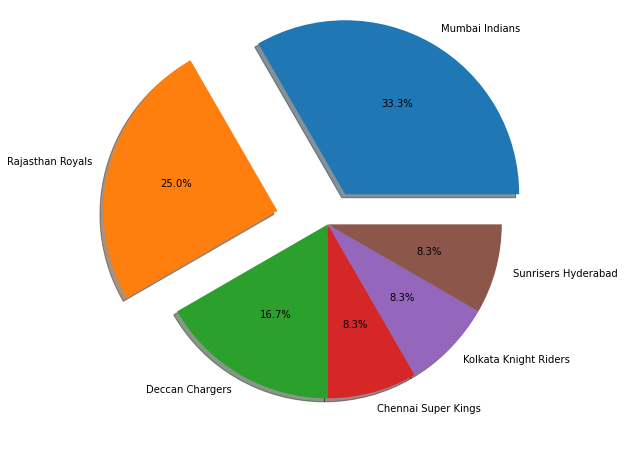

In [61]:
explode = (0.2,0.3,0,0,0,0)
plt.pie(seasons_won['Number of Seasons won'],labels=seasons_won['Team'],autopct='%1.1f%%',shadow=True,explode=explode)
plt.show()

## Mumbai Indians have won the most number of finals, followed by Rajasthan Royals.

## Sunrisers Hyderabad have won minimum number of titles.

## Let's see the Man of the Match in all the finals.

In [62]:
final_matches[['Winner','Player of the Match']].reset_index(drop=True)

,Winner,Player of the Match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


## Let's check the batsman who have played the most number of matches.

In [63]:
ipl_data['Batsman'].value_counts().sort_values(ascending=False)[:5]

V Kohli      4211
SK Raina     4044
RG Sharma    3816
S Dhawan     3776
G Gambhir    3524
Name: Batsman, dtype: int64

## Let's do the same for bowlers as well.

In [64]:
ipl_data['Bowler'].value_counts().sort_values(ascending=False)[:5]

Harbhajan Singh    3451
A Mishra           3172
PP Chawla          3157
R Ashwin           3016
SL Malinga         2974
Name: Bowler, dtype: int64

## Let's find the top 10 leading run-scorers in IPL.

In [65]:
ipl_data.groupby('Batsman')['Batsman Runs'].count().sort_values(ascending=False)[:10]

Batsman
V Kohli       4211
SK Raina      4044
RG Sharma     3816
S Dhawan      3776
G Gambhir     3524
RV Uthappa    3492
DA Warner     3398
MS Dhoni      3318
AM Rahane     3215
CH Gayle      3131
Name: Batsman Runs, dtype: int64

## Let's analyze the total number of runs scored through fours and sixes by each team.

In [66]:
six_data=ipl_data[ipl_data['Batsman Runs']==6]
six_data = six_data.groupby('Batting Team')['Batsman Runs'].agg([('Runs scored by sixes','sum'),('Number of sixes','count')])
six_data.sort_values('Number of sixes',ascending=False)

,Runs scored by sixes,Number of sixes
Batting Team,,
Royal Challengers Bangalore,6792,1132
Mumbai Indians,6576,1096
Kings XI Punjab,5856,976
Chennai Super Kings,5838,973
Kolkata Knight Riders,5580,930
Delhi Daredevils,4806,801
Rajasthan Royals,4086,681
Sunrisers Hyderabad,3198,533
Deccan Chargers,2400,400


## Royal Challengers Bangalore have scored the maximum number of runs through sixes, closely followed by Mumbai Indians, whereas teams like Rising Pune Supergiants and Kochi Tuskers Kerala have scored the least number of runs through sixes.

In [67]:
four_data = ipl_data[ipl_data['Batsman Runs']==4]
four_data = four_data.groupby('Batting Team')['Batsman Runs'].agg([('Runs scored by fours','sum'),('Number of fours','count')])
four_data.sort_values('Number of fours',ascending=False)

,Runs scored by fours,Number of fours
Batting Team,,
Mumbai Indians,10352,2588
Kings XI Punjab,9832,2458
Kolkata Knight Riders,9736,2434
Royal Challengers Bangalore,9440,2360
Chennai Super Kings,8772,2193
Delhi Daredevils,8632,2158
Rajasthan Royals,8140,2035
Sunrisers Hyderabad,5776,1444
Deccan Chargers,3828,957


## Mumbai Indians have scored the maximum number of runs through fours, closely followed by Kings XI Punjab, wherease teams like Rising Pune Supergiants and Kochi Tuskers Kerala have scored the minimum number of runs through fours. 

## Let's find the top 10 bowlers now.

In [68]:
wickets = ipl_data.dropna(subset = ['Dismissal Kind'])
wickets = wickets[~wickets['Dismissal Kind'].isin(['run out', 'retired hurt', 'obstructing the field'])]
bowlers = wickets.groupby("Bowler")['Dismissal Kind'].agg(['count']).reset_index()
bowlers = bowlers.rename(columns = {'count':'Wickets'})
bowlers.sort_values('Wickets',ascending=False).reset_index(drop=True)

,Bowler,Wickets
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
...,...,...
343,BMAJ Mendis,1
344,TP Sudhindra,1
345,LA Carseldine,1
346,S Vidyut,1


## Lasith Malinga got the most number of wickets, closely followed by Amit Mishra and Harbhajan Singh.

## Let's perceive the top 10 bowlers now.

In [69]:
bowlers.sort_values('Wickets',ascending=False).head(10).reset_index(drop=True)

,Bowler,Wickets
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


## Lasith Malinga is the leading wicket taker of IPL.

## Let's do some visualization as well for the bowlers.

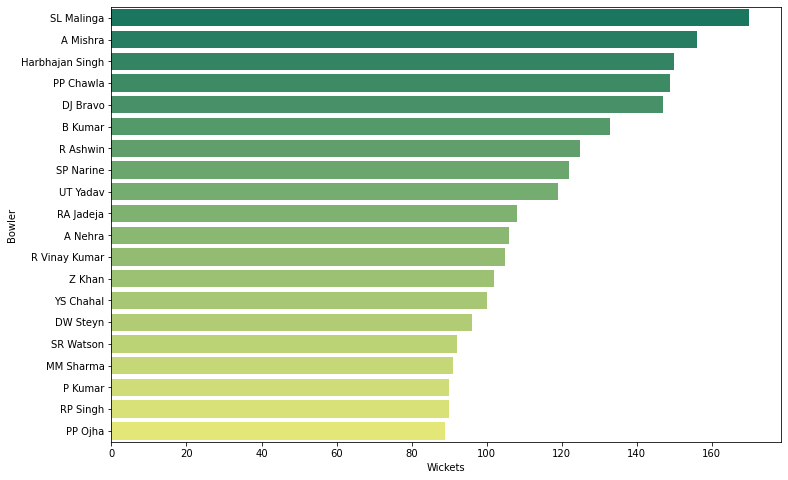

In [70]:
bowlers = bowlers.sort_values('Wickets',ascending=False).reset_index(drop=True)[:20]
sns.barplot(x='Wickets',y='Bowler',data=bowlers,palette='summer',orient="h")
plt.show()

## Lasith Malinga, Amit Mishra, Harbhajan Singh, Piyush Chawla and Dwayne Bravo are the top 5 wicket takers across all seasons of IPL.